In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [2]:
df = pd.read_csv('review2.csv')

df.head()

,name,comment
0,나,이거 지혼자 삭제되는데?
1,나,요즘 한달여간 상대방 톡이 오지도 않고 내가 보낸 톡도 상대가 읽었는데 안읽었는데 ...
2,나,왜 로그인 가입 둘다 안되나요? 계속 인증도 안된다고 하고
3,나,요즘 전송 실패가 잦아요 그리구 메시지 왔다는 알림은 오는데 실제 메시지를 받는건 ...
4,나,모르고 지웠으면 아이디 저장됬던거 싹다 지워짐 정말 불편함... ㅡㅡ


In [3]:
df['name'] = df['name'].str.strip()
df['comment'] = df['comment'].str.strip()
df['name'].replace('', np.nan, inplace=True)
df['comment'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

,name,comment
0,나,이거 지혼자 삭제되는데?
1,나,요즘 한달여간 상대방 톡이 오지도 않고 내가 보낸 톡도 상대가 읽었는데 안읽었는데 ...
2,나,왜 로그인 가입 둘다 안되나요? 계속 인증도 안된다고 하고
3,나,요즘 전송 실패가 잦아요 그리구 메시지 왔다는 알림은 오는데 실제 메시지를 받는건 ...
4,나,모르고 지웠으면 아이디 저장됬던거 싹다 지워짐 정말 불편함... ㅡㅡ


In [4]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    name, comment = row

    if name and type(name) is str:
        nouns.extend(extractor.nouns(name))
    if comment and type(comment) is str:
        nouns.extend(extractor.nouns(comment))

1596it [00:07, 205.11it/s]


In [5]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'나': 1635, '것': 307, '라': 191, '수': 158, '라인': 133, '사용': 131, '업데이트': 123, '기능': 122, '앱': 110, '저': 108, '메세지': 103, '때': 94, '로그인': 92, '인증': 88, '비밀번호': 84, '데': 84, '일시적': 79, '알람': 78, '불편': 76, '진짜': 73, '친구': 72, '이거': 69, '메일': 68, '문제': 68, '오류': 67, '비번': 64, '삭제': 62, '메시지': 60, '뭐': 59, '상대방': 54, '계정': 54, '전': 48, '어플': 47, '해결': 46, '로그': 43, '폰': 43, '사람': 43, '카톡': 40, '인증기능': 39, '이': 37, '이메일': 37, '안': 37, '이후': 37, '가입': 36, '설치': 35, '전화번호': 35, '후': 34, '대화': 34, '렉': 34, '이상': 33, '업뎃': 33, '번호': 32, '거': 31, '확인': 31, '글': 30, '전화': 29, '수정': 28, '안오': 27, '태그': 27, '검색': 27, '생각': 26, '안드로이드': 26, '통화': 26, '설정': 26, '문자': 25, 'ㅠㅠ': 25, '해시태그': 25, '말': 25, '입력': 25, '전송': 24, '안되요': 24, '하나': 24, '리': 24, '등록': 24, '쓰레기': 23, '이유': 23, '개': 23, '소리': 23, '신청': 23, 'ㅡㅡ': 22, '메신저': 22, '먹통': 22, '핸드폰': 22, '영상통화': 22, '인증번호': 22, '추': 22, '안와요': 21, '이메': 20, '데이터': 20, '자체': 20, '답답': 20, '듯': 20, '이번': 20, 'ㅋㅋ': 19, '추가': 19, '일': 19, '지': 19, '방법': 19, '타

In [6]:

for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
        
print(words)

{'라인': 133, '사용': 131, '업데이트': 123, '기능': 122, '메세지': 103, '로그인': 92, '인증': 88, '비밀번호': 84, '일시적': 79, '알람': 78, '불편': 76, '진짜': 73, '친구': 72, '이거': 69, '메일': 68, '문제': 68, '오류': 67, '비번': 64, '삭제': 62, '메시지': 60, '상대방': 54, '계정': 54, '어플': 47, '해결': 46, '로그': 43, '사람': 43, '카톡': 40, '인증기능': 39, '이메일': 37, '이후': 37, '가입': 36, '설치': 35, '전화번호': 35, '대화': 34, '이상': 33, '업뎃': 33, '번호': 32, '확인': 31, '전화': 29, '수정': 28, '안오': 27, '태그': 27, '검색': 27, '생각': 26, '안드로이드': 26, '통화': 26, '설정': 26, '문자': 25, 'ㅠㅠ': 25, '해시태그': 25, '입력': 25, '전송': 24, '안되요': 24, '하나': 24, '등록': 24, '쓰레기': 23, '이유': 23, '소리': 23, '신청': 23, 'ㅡㅡ': 22, '메신저': 22, '먹통': 22, '핸드폰': 22, '영상통화': 22, '인증번호': 22, '안와요': 21, '이메': 20, '데이터': 20, '자체': 20, '답답': 20, '이번': 20, 'ㅋㅋ': 19, '추가': 19, '방법': 19, '타임라': 19, '최악': 18, '고객센터': 18, '예전': 18, '목소리': 18, '휴대폰': 18, '게시글': 18, '탈퇴': 18, '연락': 17, '접속': 17, '근데': 17, '내용': 17, '일본': 17, '리뷰': 17, '친구추': 17, '친구신청': 17, '네이버': 16, '변경': 16, '대화방': 16, '친추': 16, '스티커': 16, '개선

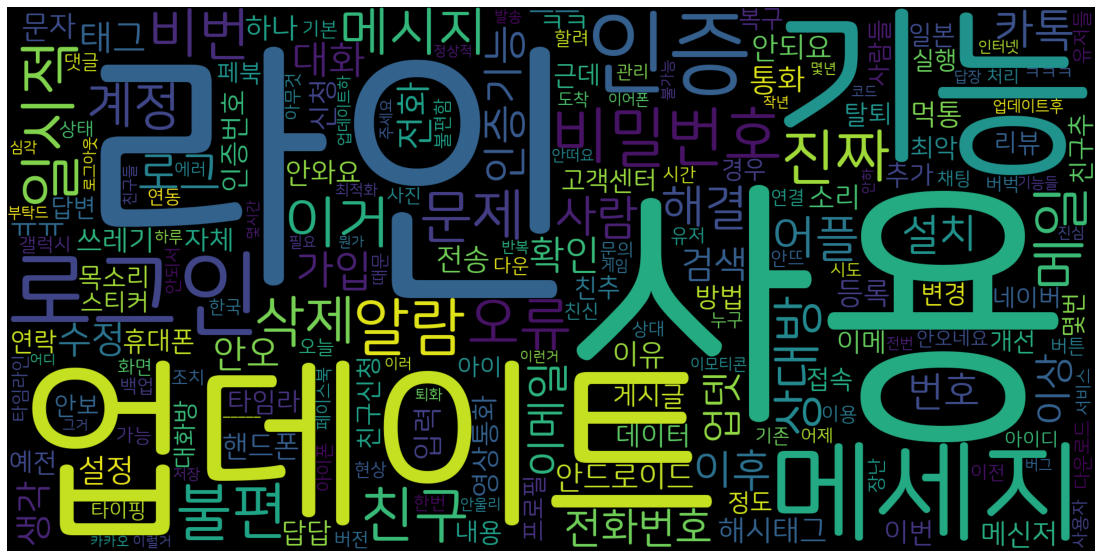

In [7]:
wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()